### Autoencoder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers,datasets,models,backend

### Dataset loading and preprocessing

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_test.shape

(10000, 28, 28, 1)

In [7]:
X_train = X_train/255.0

In [8]:
X_test = X_test/255.0

### Building the autoencoder - decoder model

#### Step 1 : Build the encoder

In [9]:
input_layer_enc = layers.Input(shape = (28,28,1))

In [10]:
x = layers.Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu')(input_layer_enc)
x = layers.MaxPool2D(pool_size = (2,2))(x)

In [11]:
x = layers.Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = (2,2))(x)

In [12]:
shape_before_flattening = backend.int_shape(x)[1:]

In [13]:
shape_before_flattening

(7, 7, 128)

In [14]:
x = layers.Flatten()(x)

In [15]:
x = layers.Dense(units = 64,activation = 'relu')(x)
output_layer_dec = layers.Dense(units = 2,activation = 'relu')(x)

In [16]:
encoder = models.Model(input_layer_enc,output_layer_dec)

In [17]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0     

#### Step 2: Building the decoder

In [18]:
input_layer_dec = layers.Input(shape=(2,))

In [19]:
x = layers.Dense(units = 64,activation = 'relu')(input_layer_dec)

In [20]:
x = layers.Dense(units = np.prod(shape_before_flattening),activation = 'relu')(x)

In [21]:
x = layers.Reshape(shape_before_flattening)(x)

In [22]:
backend.int_shape(x)[1:]

(7, 7, 128)

In [23]:
x = layers.Conv2DTranspose(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu')(x)
x = layers.UpSampling2D(size = (2,2))(x)

In [24]:
backend.int_shape(x)[1:]

(14, 14, 32)

In [25]:
x = layers.Conv2DTranspose(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu')(x)
x = layers.UpSampling2D(size = (2,2))(x)

In [26]:
backend.int_shape(x)[1:]

(28, 28, 32)

In [27]:
decoder_output = layers.Conv2D(filters = 1,kernel_size = (3,3),padding = 'same',activation = 'sigmoid')(x)

In [28]:
decoder = models.Model(input_layer_dec,decoder_output)

In [29]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                192       
                                                                 
 dense_3 (Dense)             (None, 6272)              407680    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 32)          36896     
 anspose)                                                        
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 32)        0         
 D)                                                        

### Combining the encoder and the decoder to form the autoencoder

In [30]:
autoencoder = models.Model(input_layer_enc,decoder(output_layer_dec))

In [31]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0   

In [32]:
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics='accuracy')

In [37]:
autoencoder.fit(X_train,X_train,epochs = 10,batch_size = 64,validation_data = (X_test,X_test))

Epoch 1/10
 28/938 [..............................] - ETA: 3:04 - loss: 0.3206 - accuracy: 0.4961

KeyboardInterrupt: 

In [36]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0   

In [39]:
X_train[0].shape

(28, 28, 1)

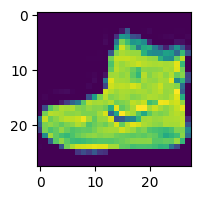

In [46]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[0])

In [51]:
pred = autoencoder.predict(X_train[:1])
pred.shape

1/1 [==============================] - 0s 38ms/step


(1, 28, 28, 1)

In [54]:
pred[0].shape

(28, 28, 1)

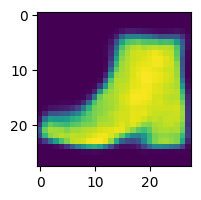

In [55]:
plt.figure(figsize = (2,2))
plt.imshow(pred[0])

In [60]:
embeddings = encoder.predict(X_train[:3])
embeddings.shape

1/1 [==============================] - 0s 25ms/step


(3, 2)

In [61]:
embeddings

array([[ 2.0709531 ,  0.41368097],
       [ 2.6860387 ,  6.7097335 ],
       [ 8.013729  , 14.813095  ]], dtype=float32)

In [81]:
trial_embeds = np.array([[2.0709531 ,  0.41368097],[2.77 ,  0.91],[1.5709531 ,  1.71368097]])
trial_embeds.shape

(3, 2)

In [82]:
pred = decoder.predict(trial_embeds)
pred.shape

1/1 [==============================] - 0s 45ms/step


(3, 28, 28, 1)

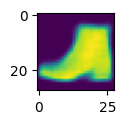

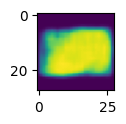

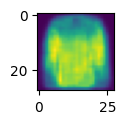

In [83]:
for i in range(3):
  plt.figure(figsize = (1,1))
  plt.imshow(pred[i])